In [1]:
import random, csv, time, os, pickle, re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.stats import bernoulli
from scipy.io import savemat


%matplotlib inline

In [2]:
def R2(yhat, y):
    ybar = np.sum(y)/len(y) 
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    return ssreg/sstot

def matching_func(param, video_score, w_hat):
    return np.linalg.norm(video_score - param[0]*np.array(w_hat) - param[1])

def regularized_vector(video_score,w_hat):
    coeff = optimize.minimize(matching_func, [0, 0], args=(video_score, w_hat))
    a = coeff['x'][0]
    b = coeff['x'][1]
    v = a*np.array(w_hat)+b
    return v

In [3]:
path = './single_result/'
error_files = [f for f in os.listdir(path) if f.endswith('.p') and 'random' not in f]
random_error_files = [f for f in os.listdir(path) if f.endswith('.p') and 'random' in f]

In [32]:
error_results = dict()
random_error_results = dict()

for f in error_files:
    n, p = re.findall( r'\d+\.*\d', f )
    
    fname = os.path.join(path, f)
    temp = pickle.load( open( fname, "rb" ) )
    
    w_star = temp['video_score']
    w_hat_raw = temp['x']
    w_hat = regularized_vector(w_star,w_hat_raw)
    
    if n not in error_results.keys():
        error_results[n] = dict()
        
    if p not in error_results[n].keys():
        error_results[n][p] = R2(w_hat, w_star)
        
for f in random_error_files:
    n, p = re.findall( r'\d+\.*\d', f )
    
    fname = os.path.join(path, f)
    temp = pickle.load( open( fname, "rb" ) )
    
    w_star = temp['video_score']
    w_hat_raw = temp['x']
    w_hat = regularized_vector(w_star,w_hat_raw)
    
    if n not in random_error_results.keys():
        random_error_results[n] = dict()
        
    if p not in random_error_results[n].keys():
        random_error_results[n][p] = []
        
        random_error_results[n][p].append(R2(w_hat, w_star))

In [33]:
video_nums = [625,1250,2500,5000, 10000]
num_edges_pct = [0.1, 0.5,1 , 2.17, 3]

625
( 0.1 , 0.416628440923 )
( 0.5 , 0.719271256666 )
( 1 , 0.824960603039 )
( 2.17 , 0.915028676328 )
( 3 , 0.941196544878 )
1250
( 0.1 , 0.438623208137 )
( 0.5 , 0.735848354965 )
( 1 , 0.843078691816 )
( 2.17 , 0.925607840683 )
( 3 , 0.943337285006 )
2500
( 0.1 , 0.458773961018 )
( 0.5 , 0.764055611245 )
( 1 , 0.852832510415 )
( 2.17 , 0.932289439725 )
( 3 , 0.948233646879 )
5000
( 0.1 , 0.458724144702 )
( 0.5 , 0.765605044587 )
( 1 , 0.869411926102 )
( 2.17 , 0.937645252608 )
( 3 , 0.953250966771 )
10000
( 0.1 , 0.449246450284 )
( 0.5 , 0.774268955143 )
( 1 , 0.881491649572 )
( 2.17 , 0.941263261057 )
( 3 , 0.956603251671 )


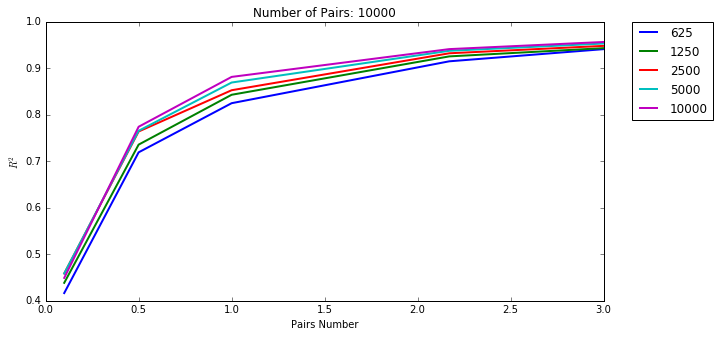

In [43]:
plt.figure(figsize=(10,5))
for video_num in video_nums:
    keys_str = error_results[str(video_num)].keys()
    keys_str = [keys_str[i].replace(".","") for i in range(len(keys_str))]
    keys = np.sort(np.array(keys_str).astype(int))
    r2 = []
    edges = []
    thresh = video_num*np.log(video_num)
    for key in keys:
        edges.append(key)
        r2.append(error_results[str(video_num)][str(key)])
        
    print video_num
    for i in range(len(num_edges_pct)):
        print '(',num_edges_pct[i],',',r2[i],')'

    plt.plot(num_edges_pct, r2,linewidth=2)
    plt.title('Number of Pairs: '+ str(video_num))
    plt.ylabel(r'$R^2$')
    plt.xlabel(r"Pairs Number")
#     plt.axvline(x=thresh,linewidth=2, color='r')
    
    plt.legend(['625','1250','2500','5000','10000'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#     plt.legend([r'$R^2$',r'$R^2$ of random', r'$R^2 = 0.9$'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylim([0.4,1])
    plt.xlim([0,3])
#     plt.scatter(edges[3], r2_random[3],s=50)
# plt.axhline(y=0.9,linewidth=1, color='k')

In [15]:
def intersect(x1,y1,x2,y2):
    y = 0.9
    a = (y1-y2)/(x1-x2)
    b = y1 - (y1-y2)/(x1-x2)*x1
    return (y-b)/a

1.3622918884526714

# Intersect with $R^2$ = 9 with no noise

In [4]:
path = './single_result_no_error/'
error_files = [f for f in os.listdir(path) if f.endswith('.p')]


In [25]:
error_results = dict()

for f in error_files:
    n, p = re.findall( r'\d+\.*\d', f )
    
    fname = os.path.join(path, f)
    temp = pickle.load( open( fname, "rb" ) )
    
    w_star = temp['video_score']
    w_hat_raw = temp['x']
    w_hat = regularized_vector(w_star,w_hat_raw)
    
    if n not in error_results.keys():
        error_results[n] = dict()
        
    if p not in error_results[n].keys():
        error_results[n][p] = R2(w_hat, w_star)

In [26]:
video_nums = [625,1250,2500,5000, 10000]
num_edges_pct = [0.1, 0.5,1 , 2.17, 3]

In [27]:
# plt.figure(figsize=(10,5))
for video_num in video_nums:
    keys_str = error_results[str(video_num)].keys()
    keys_str = [keys_str[i].replace(".","") for i in range(len(keys_str))]
    keys = np.sort(np.array(keys_str).astype(int))
    r2 = []
    edges = []
    thresh = video_num*np.log(video_num)
    for key in keys:
        edges.append(key)
        r2.append(error_results[str(video_num)][str(key)])
        
    print '(', num_edges_pct[2],',', r2[2],',', num_edges_pct[3],',', r2[3],')'

( 1 , 0.869564297213 , 2.17 , 0.934950041083 )
( 1 , 0.868350682664 , 2.17 , 0.939997166109 )
( 1 , 0.882011747041 , 2.17 , 0.946347195662 )
( 1 , 0.888968058232 , 2.17 , 0.949881173517 )
( 1 , 0.8968612916 , 2.17 , 0.952466560856 )


In [28]:
intersect(1 , 0.868350682664 , 2.17 , 0.939997166109 )


1.516839061773998

# $R^2$ as a function of $\frac {p} {nlogn}$

In [29]:
plt.figure(figsize=(10,5))
for video_num in video_nums:
    keys_str = error_results[str(video_num)].keys()
    keys_str = [keys_str[i].replace(".","") for i in range(len(keys_str))]
    keys = np.sort(np.array(keys_str).astype(int))
    r2 = []
    edges = []
    thresh = video_num*np.log(video_num)
    for key in keys:
        edges.append(key)
        r2.append(error_results[str(video_num)][str(key)])
        
    r2_random = []
    thresh_random = video_num*np.log(video_num)
    for key in keys:
        r2_random.append(random_error_results[str(video_num)][str(key)])
        
    print '(', num_edges_pct[2],',', r2[2],',', num_edges_pct[3],',', r2[3],')'

    plt.plot(num_edges_pct, r2,linewidth=2)
#     plt.plot(edges, r2_random,'b.-')
    
    plt.title('Number of Pairs: '+str(video_num))
    plt.ylabel(r'$R^2$')
    plt.xlabel(r"Pairs Number")
#     plt.axvline(x=thresh,linewidth=2, color='r')
    
    plt.legend(['625','1250','2500','5000','10000'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#     plt.legend([r'$R^2$',r'$R^2$ of random', r'$R^2 = 0.9$'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylim([0.4,1])
    plt.xlim([0,edges[-1]*1.05])
    plt.scatter(edges[3], r2_random[3],s=50)
plt.axhline(y=0.9,linewidth=1, color='k')

KeyError: '625'

# Below we explore the effect of sigma

In [4]:
path = './sigma_results/'
error_files = [f for f in os.listdir(path) if f.endswith('.p')]

error_results = dict()

for f in error_files:
    sigma, n, p = re.findall( r'\d+\.*\d', f )
    
    fname = os.path.join(path, f)
    temp = pickle.load( open( fname, "rb" ) )
    
    w_star = temp['video_score']
    w_hat_raw = temp['x']
    w_hat = regularized_vector(w_star,w_hat_raw)
    
    if n not in error_results.keys():
        error_results[n] = dict()
        
    if p not in error_results[n].keys():
        error_results[n][p] = R2(w_hat, w_star)
        
video_nums = [625,1250,2500,5000, 10000]
num_edges_pct = [0.1, 0.5,1 , 2.17, 3]


for video_num in video_nums:
    print video_num
    keys_str = error_results[str(video_num)].keys()
    keys_str = [keys_str[i].replace(".","") for i in range(len(keys_str))]
    keys = np.sort(np.array(keys_str).astype(int))
    r2 = []
    edges = []
    thresh = video_num*np.log(video_num)
    for key in keys:
        edges.append(key)
        r2.append(error_results[str(video_num)][str(key)])
        
    r2_random = []
    thresh_random = video_num*np.log(video_num)
    for key in keys:
        r2_random.append(random_error_results[str(video_num)][str(key)])
    for i in range(len(r2)):    
        print '(', num_edges_pct[i],',', r2[i],')'

ValueError: need more than 2 values to unpack

In [6]:
re.findall( r'\d+\.*\d', f )

['10000', '199864']

In [7]:
f

'sigma_3_10000_at_199864.p'